**Analyzing Student Perfromance**

**Importing Some Libraries**

In [2]:
# for basic mathematical and dataframe operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


**Reading the data**

In [3]:
# also checking the compuatation time

%time data = pd.read_csv('StudentsPerformance.csv')

data.shape

Wall time: 6.99 ms


(1000, 8)

In [4]:
# checking the first 5 rows and columns

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# describing the data

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# checking if the data contains any NULL values

data.isnull().sum().sum()


0

# Data Visualization

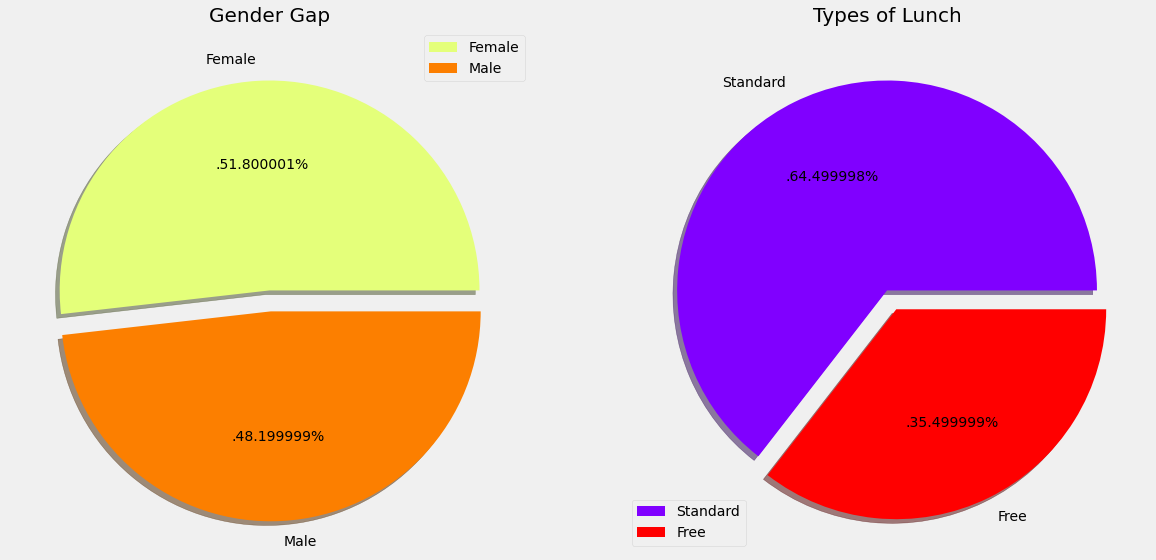

In [6]:
# visualising the number of male and female in the dataset

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()


plt.subplot(1, 2, 2)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = plt.cm.rainbow(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Types of Lunch', fontsize = 20)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()

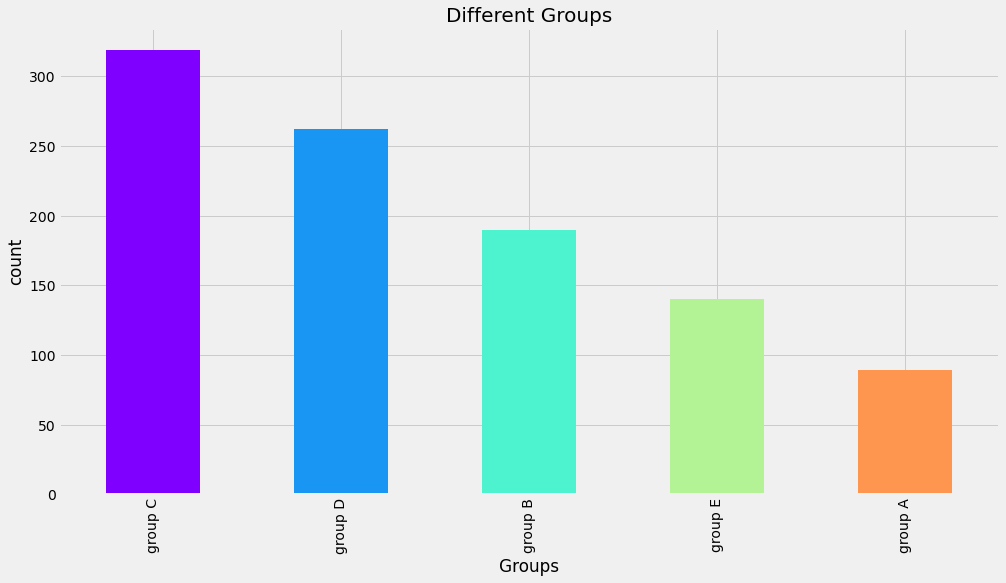

In [7]:
# visualizing the different groups in the dataset

plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.rainbow(np.linspace(0, 1, 6))
data['race/ethnicity'].value_counts(dropna = False).plot.bar(color = color)
plt.title('Different Groups', fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

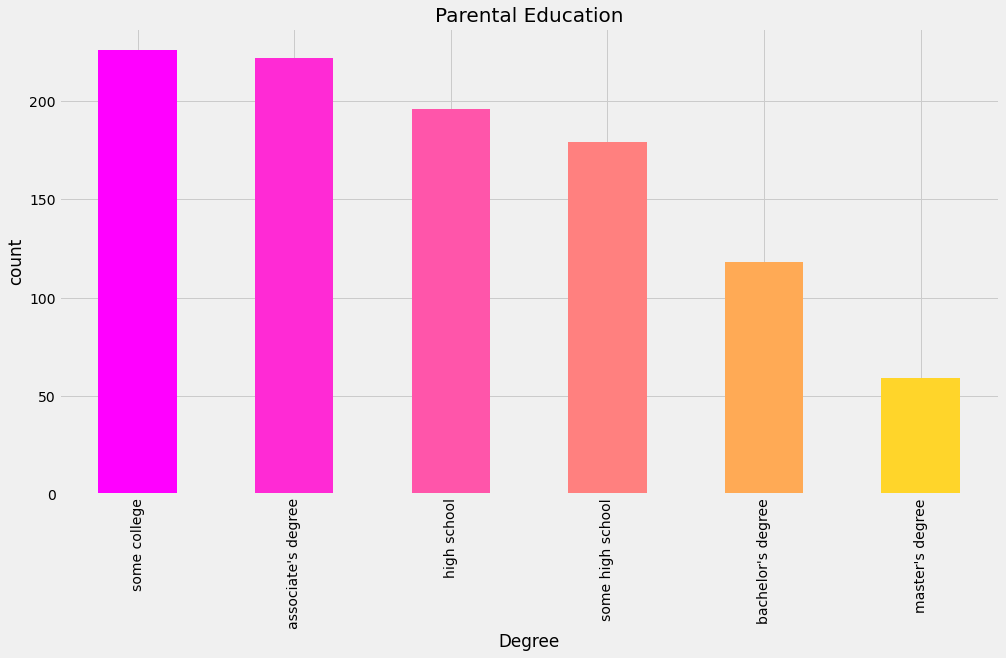

In [8]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.spring(np.linspace(0, 1, 7))
data['parental level of education'].value_counts(dropna = False).plot.bar(color = color)
plt.title('Parental Education', fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

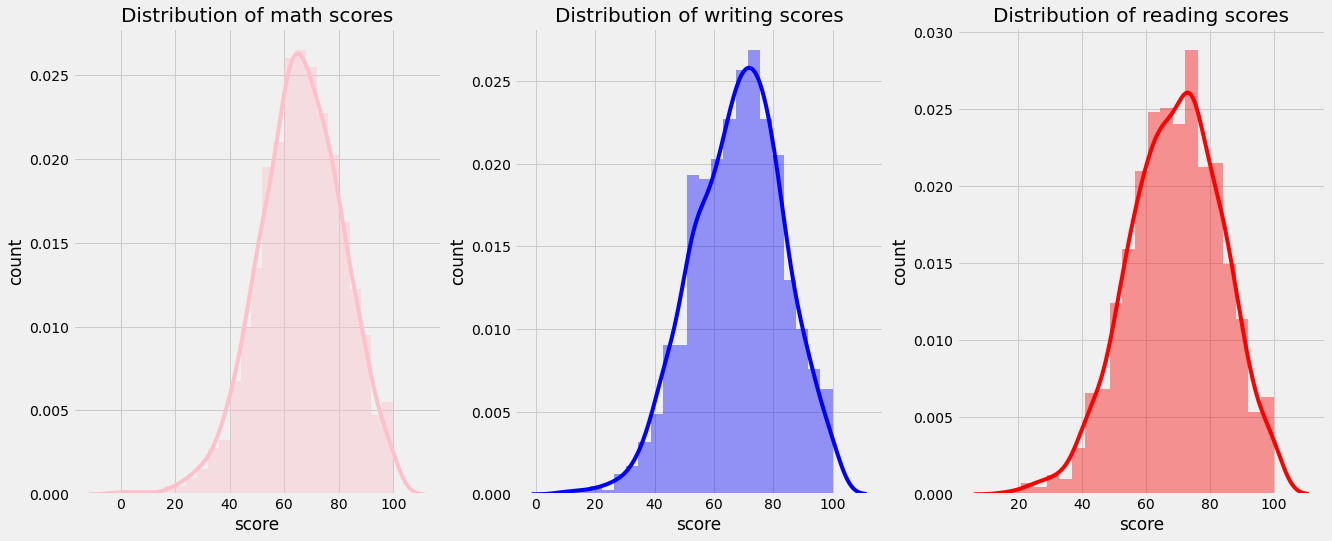

In [9]:
# visualizing maths score

plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 3, 1)
sns.distplot(data['math score'], color = 'pink')
plt.title('Distribution of math scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.distplot(data['writing score'], color = 'blue')
plt.title('Distribution of writing scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.distplot(data['reading score'], color = 'red')
plt.title('Distribution of reading scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.show()

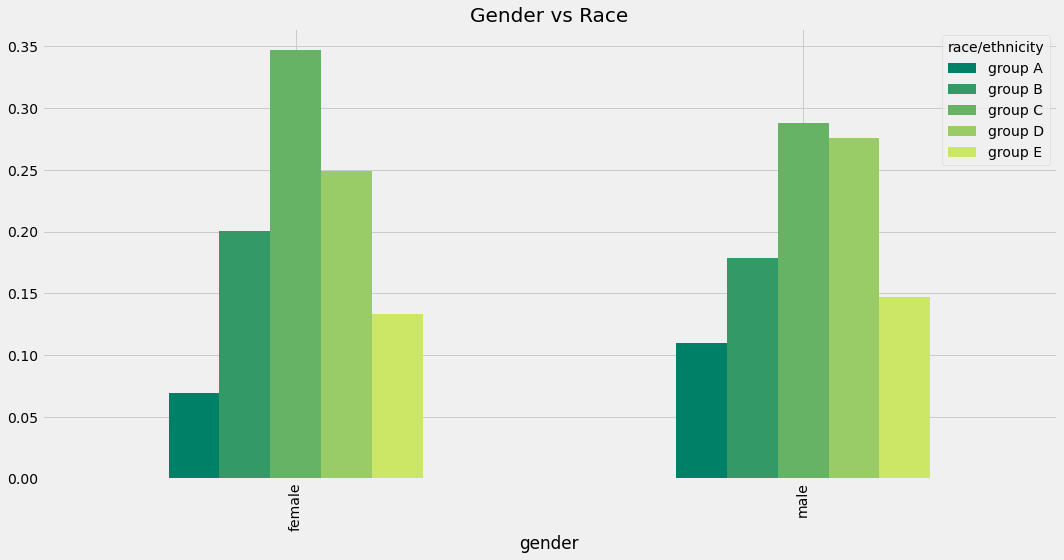

In [10]:
# gender vs race/etnicity 

x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = False,
                                             figsize = (15, 8),
                                             color = plt.cm.summer(np.linspace(0, 1, 6)))

plt.title('Gender vs Race', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

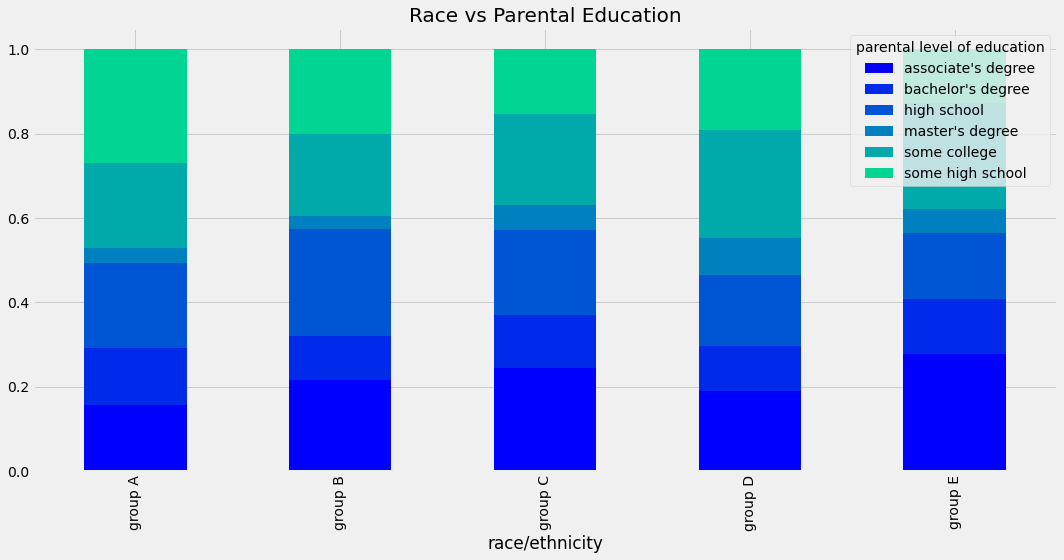

In [11]:
# comparison of race/ethnicity and parental level of education

x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = 'True',
                                             figsize = (15, 8),
                                             color = plt.cm.winter(np.linspace(0, 1, 7)))

plt.title('Race vs Parental Education', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

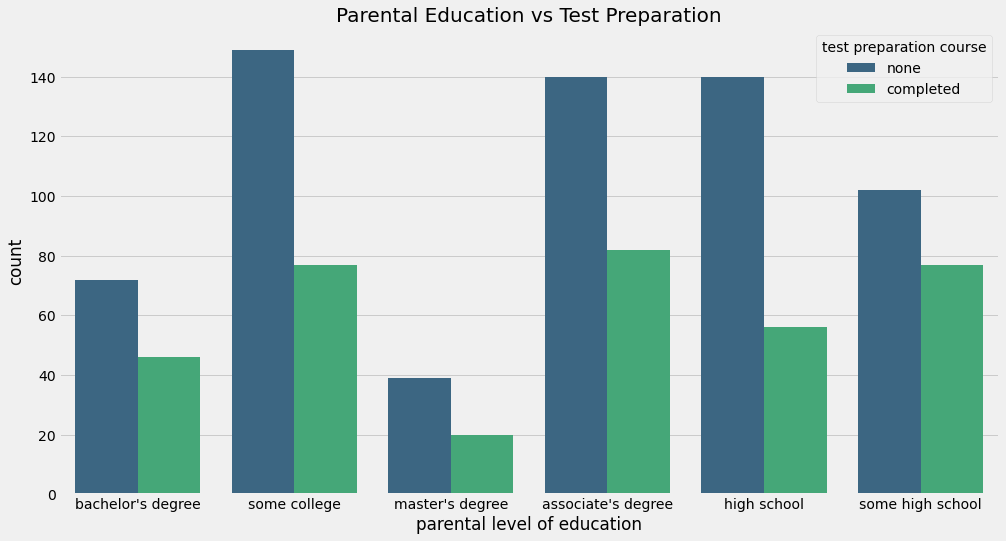

In [12]:
# comparison of parental degree and test course

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'viridis')
plt.title('Parental Education vs Test Preparation', fontsize = 20)
plt.show()

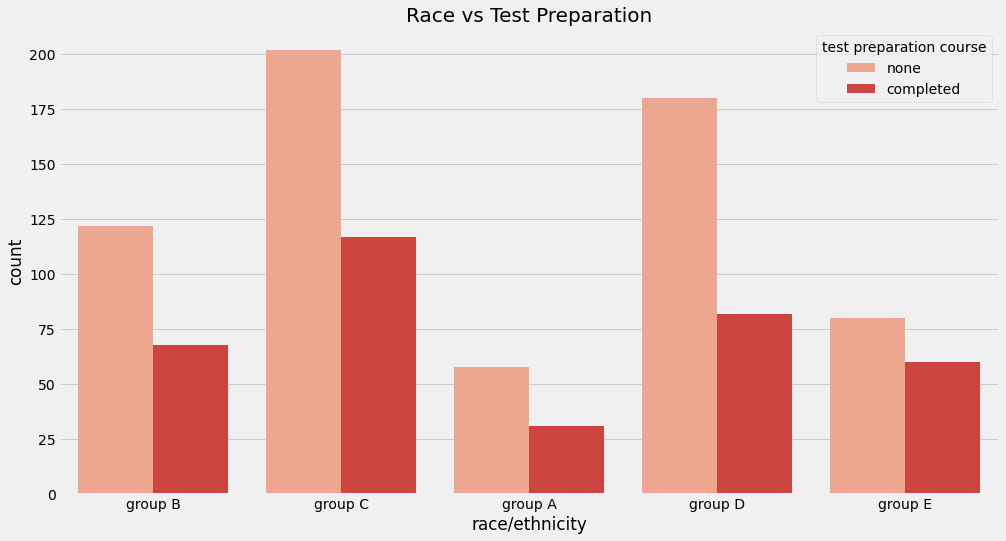

In [13]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'Reds')
plt.title('Race vs Test Preparation', fontsize = 20)
plt.show()

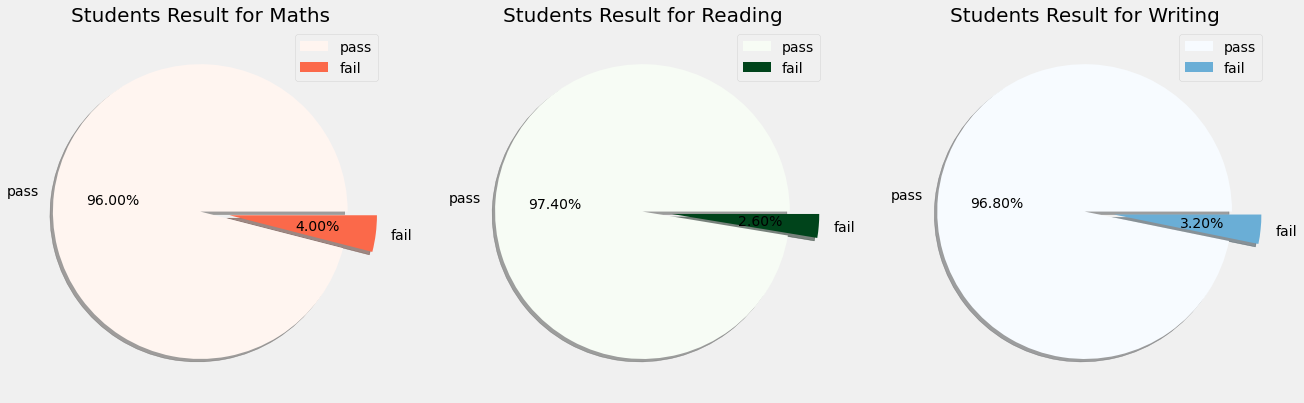

In [7]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40
plt.rcParams['figure.figsize'] = (20, 10)

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')

# pie chart to represent the ratio of pass and fail status between the students

size = data['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = data['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = data['pass_writing'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()

plt.show()



C:\Users\USER\AppData\Local\Temp/ipykernel_15664/4099944561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentage'][i] = ceil(data['percentage'][i])
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

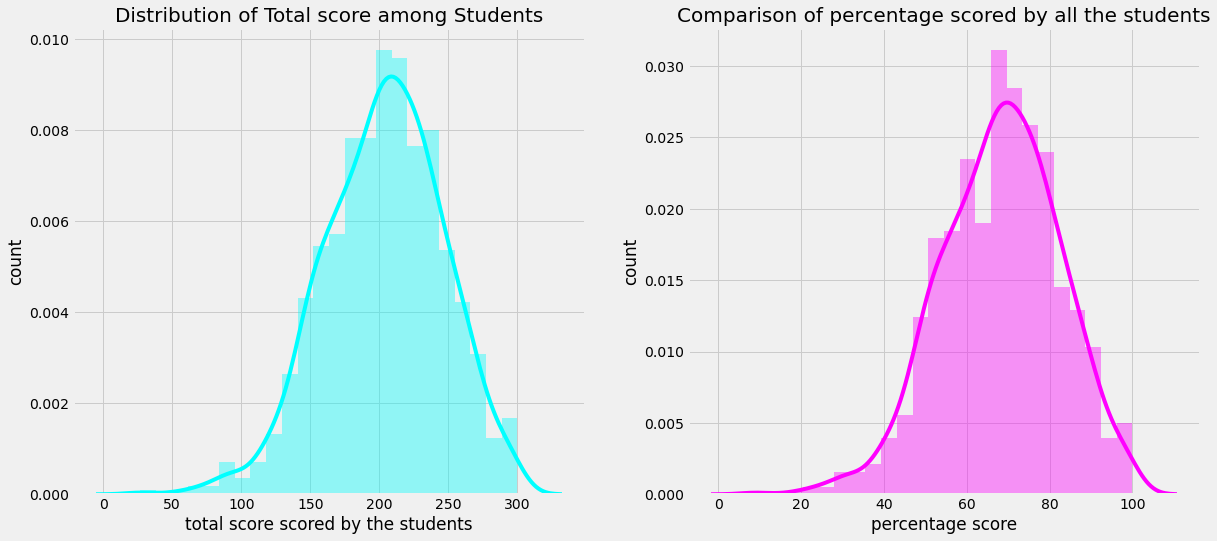

In [8]:
# computing the total score for each student

from math import * 
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.distplot(data['total_score'], color = 'cyan')
plt.title('Distribution of Total score among Students', fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.distplot(data['percentage'], color = 'magenta')
plt.title('Comparison of percentage scored by all the students', fontsize = 20)
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

plt.show()

In [9]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

# plt.rcParams['figure.figsize'] = (15, 8)
# sns.countplot(data['status'], palette = 'autumn')
# plt.title('overall results', fontsize = 20)
# plt.xlabel('status')
# plt.ylabel('count')
# plt.show()

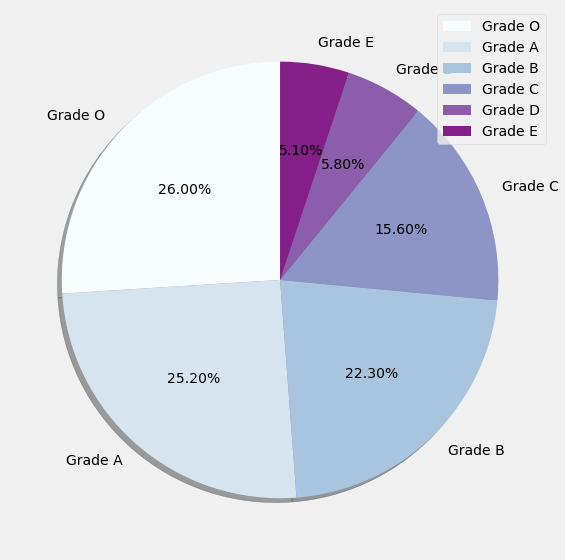

In [10]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade O', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = data['grades'].value_counts()
colors = plt.cm.BuPu(np.linspace(0, 1, 7))
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

plt.pie(sizes, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.legend(loc = 'upper right')
plt.axis('off')
plt.tight_layout()
plt.show()

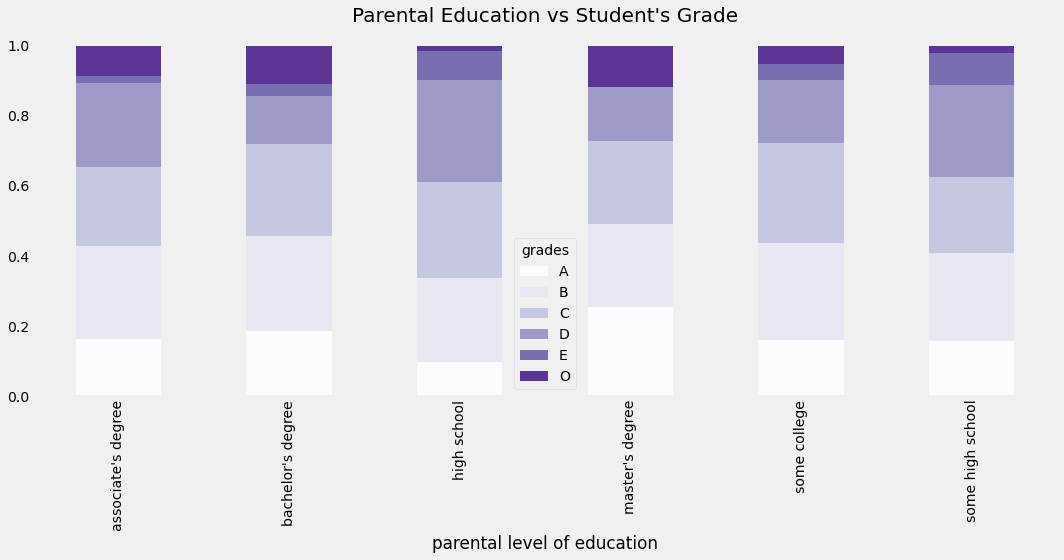

In [11]:
# comparison parent's degree and their corresponding grades

x = pd.crosstab(data['parental level of education'], data['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = True,
                                             figsize = (15, 8),
                                             color = plt.cm.Purples(np.linspace(0, 1, 7)))

plt.title("Parental Education vs Student's Grade", fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

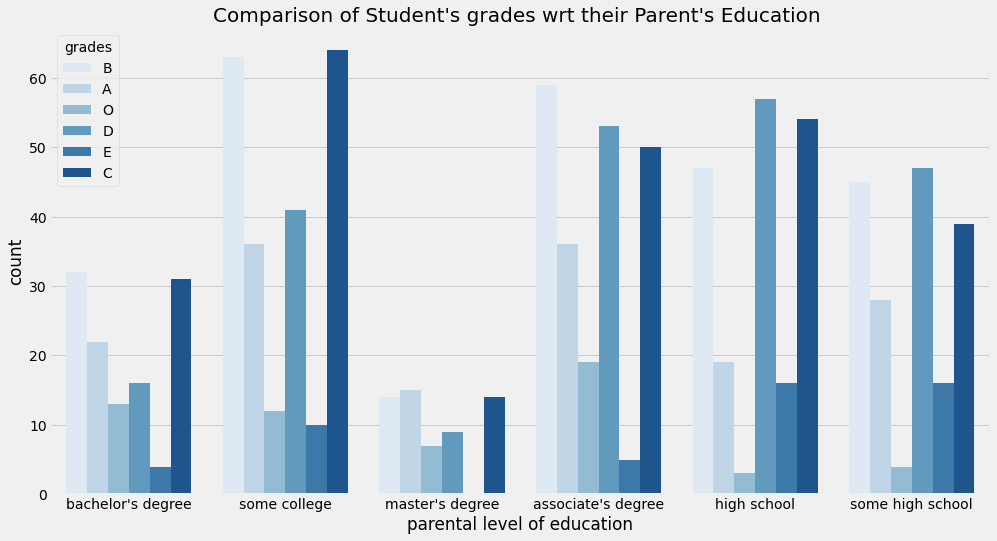

In [19]:
# for better visualization we will plot it again using seaborn

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'Blues')
plt.title("Comparison of Student's grades wrt their Parent's Education ", fontsize = 20)
plt.show()

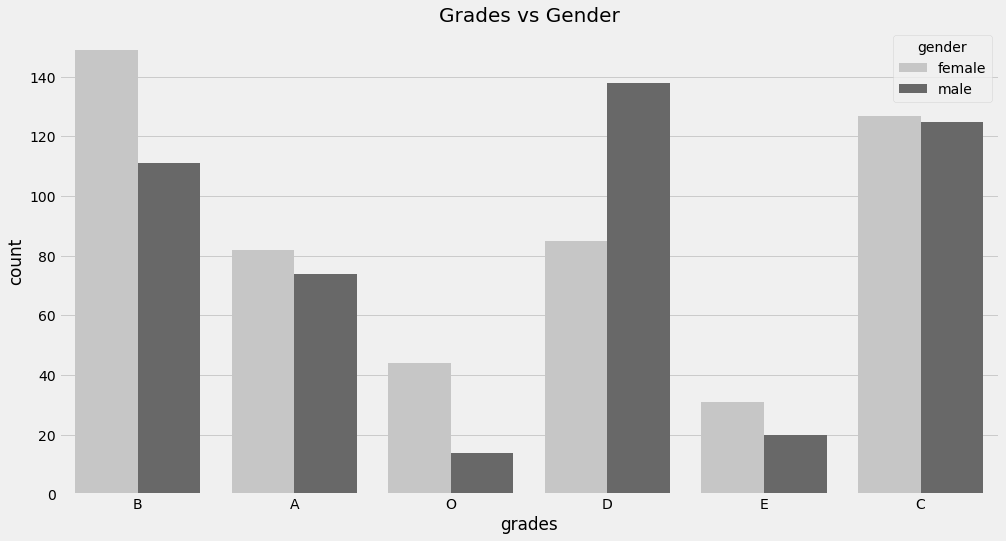

In [20]:
# comparing the distribution of grades among males and females

sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'Greys')
plt.title('Grades vs Gender', fontsize = 20)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


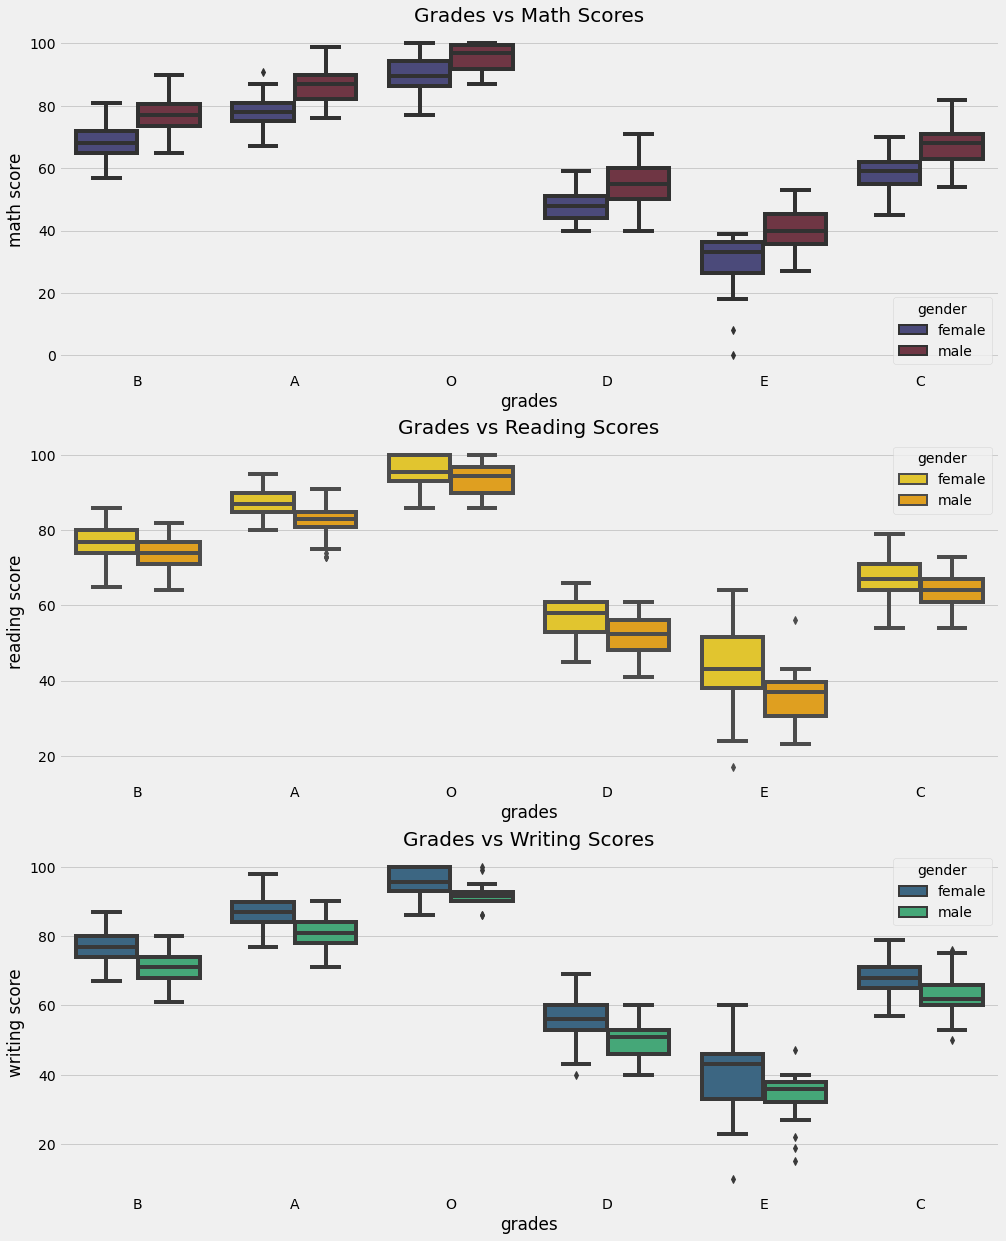

In [12]:
plt.rcParams['figure.figsize'] = (15, 20)

plt.subplot(3, 1, 1)
sns.boxplot(data['grades'], data['math score'], hue = data['gender'], palette = 'icefire')
plt.title('Grades vs Math Scores', fontsize = 20)

plt.subplot(3, 1, 2)
sns.boxplot(data['grades'], data['reading score'], hue = data['gender'], palette = 'Wistia')
plt.title('Grades vs Reading Scores', fontsize = 20)

plt.subplot(3, 1, 3)
sns.boxplot(data['grades'], data['writing score'], hue = data['gender'], palette = 'viridis')
plt.title('Grades vs Writing Scores', fontsize = 20)

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


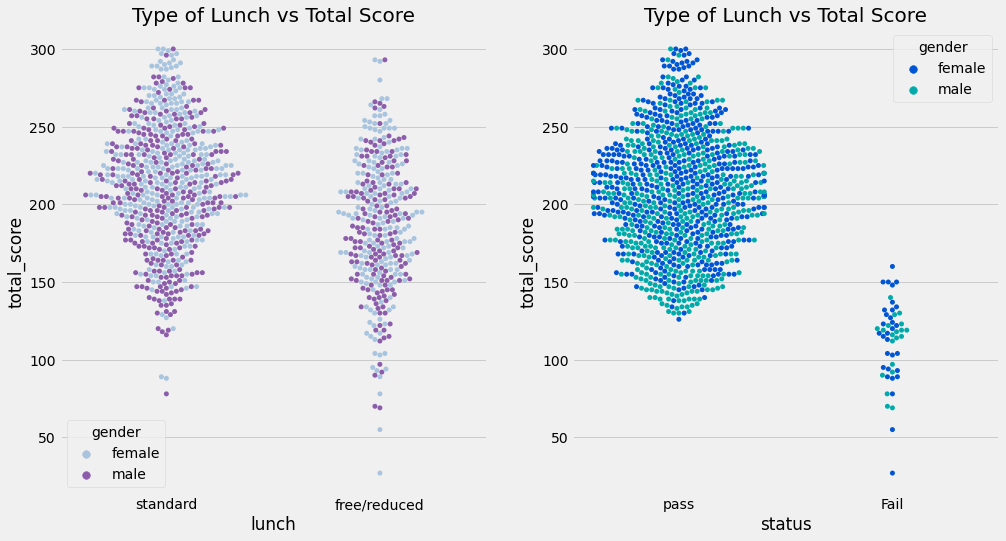

In [22]:
# lunch type vs total marks obtained by students

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1, 2, 1)
sns.swarmplot(data['lunch'], data['total_score'], hue = data['gender'], palette = 'BuPu')
plt.title('Type of Lunch vs Total Score', fontsize = 20)

plt.subplot(1, 2, 2)
sns.swarmplot(data['status'], data['total_score'], hue = data['gender'], palette = 'winter')
plt.title('Type of Lunch vs Total Score', fontsize = 20)

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\l

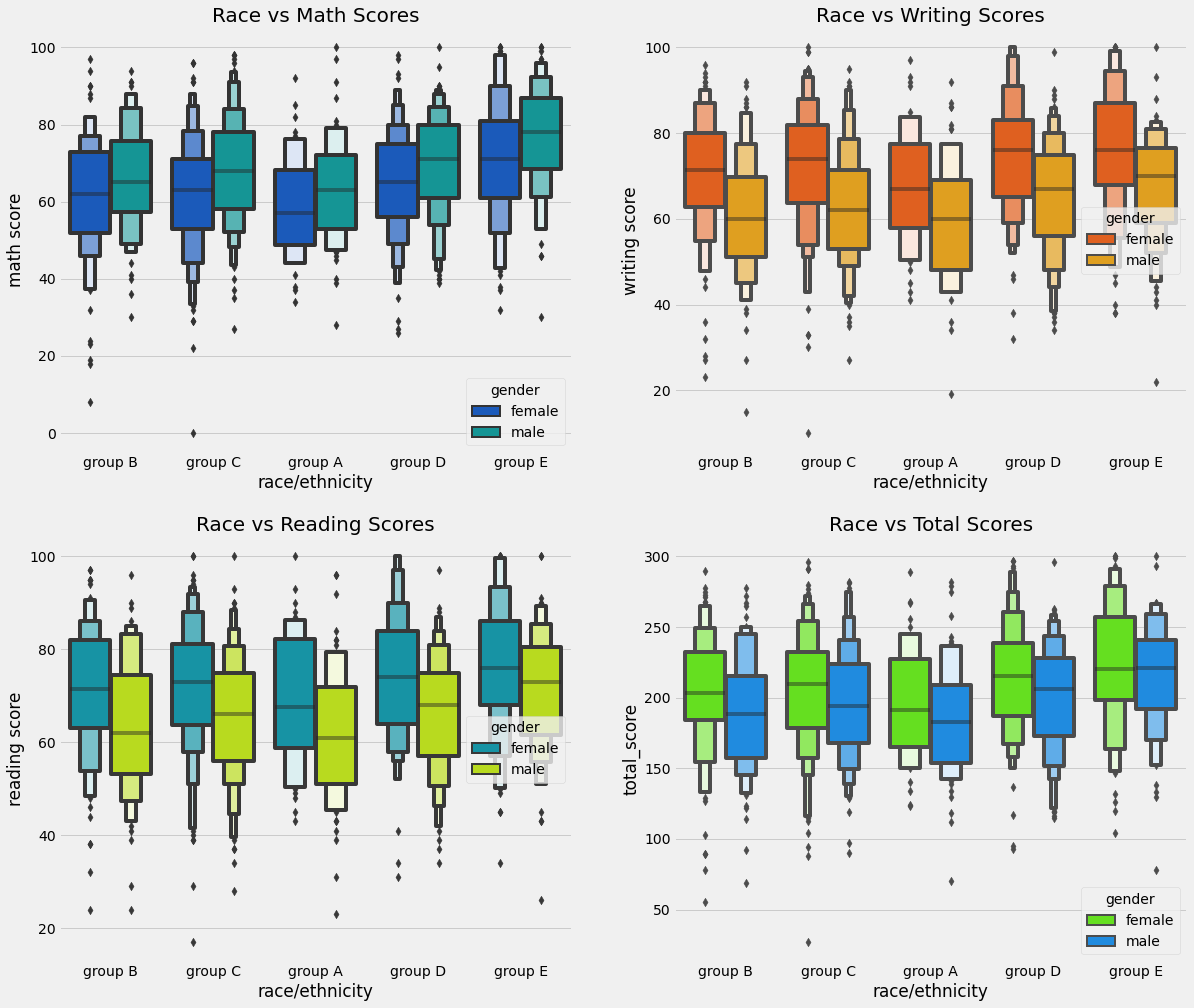

In [23]:
# race vs grades

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.boxenplot(data['race/ethnicity'], data['math score'], hue = data['gender'], palette = 'winter')
plt.title('Race vs Math Scores', fontsize = 20)

plt.subplot(2, 2, 2)
sns.boxenplot(data['race/ethnicity'], data['writing score'], hue = data['gender'], palette = 'autumn')
plt.title('Race vs Writing Scores', fontsize = 20)

plt.subplot(2, 2, 3)
sns.boxenplot(data['race/ethnicity'], data['reading score'], hue = data['gender'], palette = 'nipy_spectral')
plt.title('Race vs Reading Scores', fontsize = 20)

plt.subplot(2, 2, 4)
sns.boxenplot(data['race/ethnicity'], data['total_score'], hue = data['gender'], palette = 'gist_rainbow')
plt.title('Race vs Total Scores', fontsize = 20)

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Race vs Percentage wrt Types of Lunch')

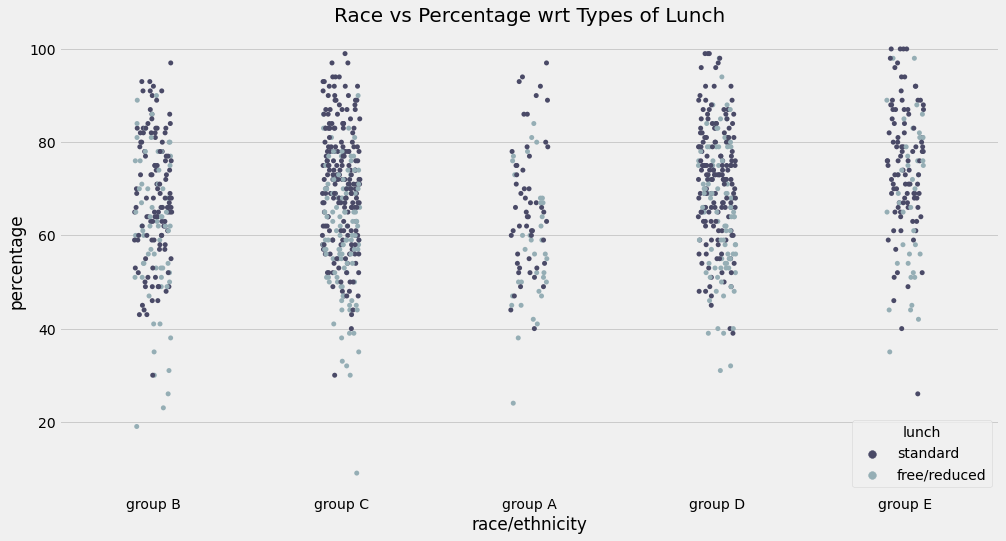

In [24]:
# race vs gender vs

plt.rcParams['figure.figsize'] = (15, 8)
sns.stripplot(data['race/ethnicity'], data['percentage'], hue = data['lunch'], jitter = True, palette = 'bone')
plt.title('Race vs Percentage wrt Types of Lunch', fontsize = 20)

C:\Users\USER\AppData\Local\Temp/ipykernel_13752/3746124644.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'rainbow', annot = True)


Text(0.5, 1.0, 'Correlations between the attributes')

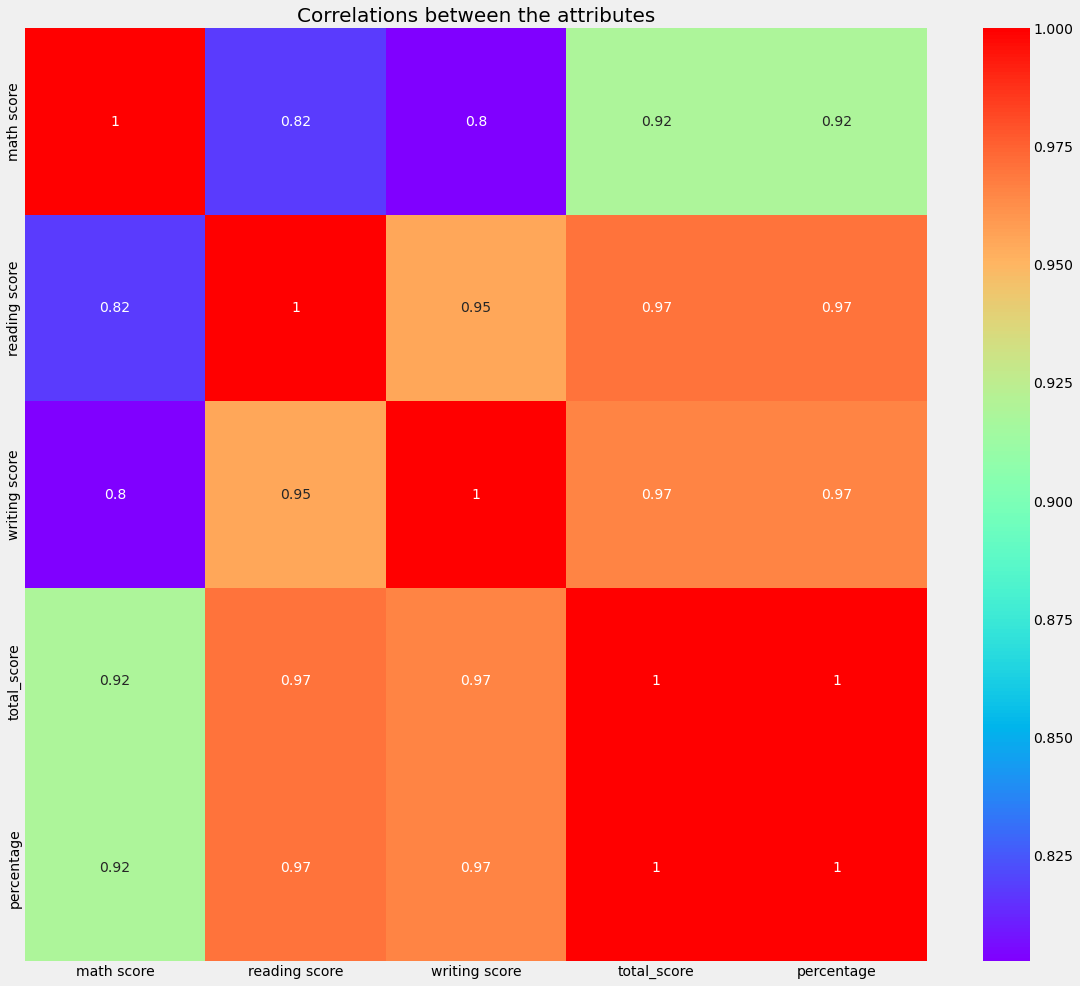

In [25]:
# heatmap

plt.rcParams['figure.figsize'] = (18, 16)
sns.heatmap(data.corr(), cmap = 'rainbow', annot = True)
plt.title('Correlations between the attributes', fontsize = 20)

# Data Preprocessing

In [13]:
# LABEL ENCODING

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['lunch'] = le.fit_transform(data['lunch'])
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['gender'] = le.fit_transform(data['gender'])
data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['status'] = le.fit_transform(data['status'])
data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)

In [31]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,0,2,1,1,1,72,72,74,1,1,1,218,73.0,1,2
1,0,3,4,1,0,69,90,88,1,1,1,247,83.0,1,1
2,0,2,3,1,1,90,95,93,1,1,1,278,93.0,1,0
3,1,1,0,0,1,47,57,44,1,1,1,148,50.0,1,4
4,1,3,4,1,1,76,78,75,1,1,1,229,77.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,1,1,1,282,94.0,1,0
996,1,3,2,0,1,62,55,55,1,1,1,172,58.0,1,4
997,0,3,2,0,0,59,71,65,1,1,1,195,65.0,1,3
998,0,4,4,1,0,68,78,77,1,1,1,223,75.0,1,2


In [101]:
df = pd.DataFrame(data)
df.drop(['gender', 'race/ethnicity','parental level of education','test preparation course','lunch'], axis=1)

,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,72,72,74,1,1,1,218,73.0,1,2
1,69,90,88,1,1,1,247,83.0,1,1
2,90,95,93,1,1,1,278,93.0,1,0
3,47,57,44,1,1,1,148,50.0,1,4
4,76,78,75,1,1,1,229,77.0,1,2
...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,1,1,282,94.0,1,0
996,62,55,55,1,1,1,172,58.0,1,4
997,59,71,65,1,1,1,195,65.0,1,3
998,68,78,77,1,1,1,223,75.0,1,2


In [98]:
minValue = df[['math score', 'reading score','writing score','total_score','percentage']].min()
minValue

math score        0.0
reading score    17.0
writing score    10.0
total_score      27.0
percentage        9.0
dtype: float64

In [99]:
maxValue = df[['math score', 'reading score','writing score','total_score','percentage']].max()
maxValue

math score       100.0
reading score    100.0
writing score    100.0
total_score      300.0
percentage       100.0
dtype: float64

In [102]:
# splitting the dependent and independent variables

x = data.iloc[:,5:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 9)
(1000,)


In [103]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test)
print(y_val)

(600, 9)
(600,)
(200, 9)
(200,)
     math score  reading score  writing score  pass_math  pass_reading  \
908          67             75             72          1             1   
265          59             42             41          1             1   
627          61             48             46          1             1   
327          28             23             19          0             0   
244          75             74             69          1             1   
..          ...            ...            ...        ...           ...   
490          65             85             76          1             1   
524          53             52             49          1             1   
666          63             73             71          1             1   
971          78             72             69          1             1   
732          87             89             94          1             1   

     pass_writing  total_score  percentage  status  
908             1         

In [104]:
print("X_train shape: {}".format(x_train.shape))
print("X_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (600, 9)
X_test shape: (200, 9)
y_train shape: (600,)
y_test shape: (200,)
X_val shape: (600,)
y val shape: (200,)


In [105]:
y_val

269    2
550    2
196    3
242    4
149    0
      ..
282    2
112    4
153    4
582    2
795    3
Name: grades, Length: 200, dtype: int64

In [106]:
x_train_data=pd.DataFrame(x_train)
x_train_data

,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status
147,73,68,66,1,1,1,207,69.0,1
682,62,55,54,1,1,1,171,57.0,1
123,63,57,56,1,1,1,176,59.0,1
880,63,64,66,1,1,1,193,65.0,1
586,55,73,73,1,1,1,201,67.0,1
...,...,...,...,...,...,...,...,...,...
959,75,81,71,1,1,1,227,76.0,1
622,58,51,52,1,1,1,161,54.0,1
978,55,41,48,1,1,1,144,48.0,1
631,79,60,65,1,1,1,204,68.0,1


In [108]:
minValue = x_train_data[['math score', 'reading score','writing score','total_score','percentage']].min()
minValue

math score       18.0
reading score    24.0
writing score    15.0
total_score      69.0
percentage       23.0
dtype: float64

In [109]:
maxValue = x_train_data[['math score', 'reading score','writing score','total_score','percentage']].max()
maxValue

math score       100.0
reading score    100.0
writing score    100.0
total_score      300.0
percentage       100.0
dtype: float64

In [89]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)
print(x_train[-1])

[0.17073171 0.13157895 0.27058824 0.         0.         0.
 0.15151515 0.15584416 0.        ]


# Modelling

# 1.Logistic Regression

In [73]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression(penalty = 'l2', solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.8633333333333333
Testing Accuracy : 0.845


In [74]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))

In [49]:
#print(model.predict([[0,1,0,1,0,0.65,0.69879518,0.74444444,1,1,1,0.6959707,0.7032967,1]]))
#print(model.predict([[1,1,0.8,1,1,0.59,0.40963855,0.36666667,1,1,1,0.46153846,0.46153846,1]]))
#print(model.predict([[1,1,0.8,1,1,0.79,0.70963855,0.86666667,1,1,1,0.86153846,0.76153846,1]]))

In [94]:
predict=model.predict([[0.17,0.13,0.27,0,0,0,0.15,0.15,0]])
print(predict)

[5]


In [75]:
classifier = LogisticRegression()
classifier.fit(x, y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
!pip install sl

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sl: filename=sl-1.0-py3-none-any.whl size=2200 sha256=400e2b52ceebe072f0ec845c6997fc3ca8d803046e99b27b291c5cb1a7b70716
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b4\41\b9\2ee049d1f0fb6d8e4b1dbc6df003fccbd38bd9df62ffc309a9
Successfully built sl



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import joblib

In [76]:
joblib.dump(classifier, 'classifier.pkl')


['classifier.pkl']

In [60]:
predict=classifier.predict([[0.79,0.70963855,0.86666667,1,1,1,0.86153846,0.76153846,1]])
print(predict)

NameError: name 'classifier' is not defined

In [99]:
# !pip install flask

In [98]:
# from flask import Flask

In [97]:
# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#      json_ = request.json
#      query_df = pd.DataFrame(json_)
#      query = pd.get_dummies(query_df)
    
#      classifier = joblib.load('classifier.pkl')
#      prediction = classifier.predict(query)
#      return jsonify({'prediction': list(prediction)})


# if __name__ == '__main__':
#      app.run(port=8080)

**Confusion Matrix**

<AxesSubplot:>

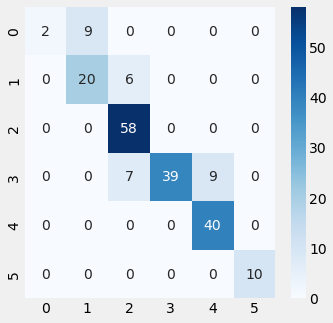

In [77]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')

**Classification Report**

In [78]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.69      0.77      0.73        26
           2       0.82      1.00      0.90        58
           3       1.00      0.71      0.83        55
           4       0.82      1.00      0.90        40
           5       1.00      1.00      1.00        10

    accuracy                           0.84       200
   macro avg       0.89      0.78      0.78       200
weighted avg       0.87      0.84      0.83       200



**Cross Val**

In [79]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

NameError: name 'X_train' is not defined

# SVM

In [90]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.98
Testing Accuracy : 0.975


<AxesSubplot:>

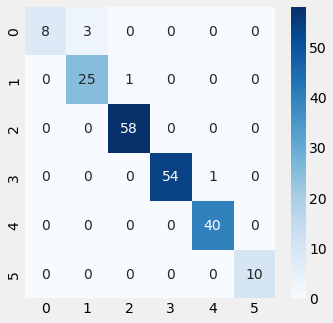

In [91]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')

In [92]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.89      0.96      0.93        26
           2       0.98      1.00      0.99        58
           3       1.00      0.98      0.99        55
           4       0.98      1.00      0.99        40
           5       1.00      1.00      1.00        10

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.98      0.97      0.97       200



In [93]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))

In [84]:
x_train

array([[0.67073171, 0.57894737, 0.6       , ..., 0.5974026 , 0.5974026 ,
        1.        ],
       [0.53658537, 0.40789474, 0.45882353, ..., 0.44155844, 0.44155844,
        1.        ],
       [0.54878049, 0.43421053, 0.48235294, ..., 0.46320346, 0.46753247,
        1.        ],
       ...,
       [0.45121951, 0.22368421, 0.38823529, ..., 0.32467532, 0.32467532,
        1.        ],
       [0.74390244, 0.47368421, 0.58823529, ..., 0.58441558, 0.58441558,
        1.        ],
       [0.17073171, 0.13157895, 0.27058824, ..., 0.15151515, 0.15584416,
        0.        ]])

In [86]:
print(x_train[0])

[0.67073171 0.57894737 0.6        1.         1.         1.
 0.5974026  0.5974026  1.        ]


,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status
0,72,72,74,1,1,1,218,73.0,1
1,69,90,88,1,1,1,247,83.0,1
2,90,95,93,1,1,1,278,93.0,1
3,47,57,44,1,1,1,148,50.0,1
4,76,78,75,1,1,1,229,77.0,1
...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,1,1,282,94.0,1
996,62,55,55,1,1,1,172,58.0,1
997,59,71,65,1,1,1,195,65.0,1
998,68,78,77,1,1,1,223,75.0,1


**Thanks for Reading the Kernel, Please upvote if you like.**